In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'veneto'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,5,Veneto,12,7,19,23,42,10,10,...,0.0,1580.0,0.0,7.0,36.84,45.24,0.63,0.00,75.00,31.25
1,2020-02-26T18:00:00,5,Veneto,16,8,24,45,69,27,28,...,1.0,1120.0,0.0,22.0,33.33,34.78,2.50,0.00,14.29,64.29
2,2020-02-27T18:00:00,5,Veneto,19,8,27,82,109,40,40,...,0.0,1264.0,0.0,37.0,29.63,24.77,3.16,0.00,0.00,57.97
3,2020-02-28T18:00:00,5,Veneto,24,9,33,116,149,40,40,...,0.0,1250.0,0.0,34.0,27.27,22.15,3.20,0.00,12.50,36.70
4,2020-02-29T17:00:00,5,Veneto,24,11,35,154,189,40,40,...,0.0,1245.0,0.0,38.0,31.43,18.52,3.21,0.00,22.22,26.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-02-19T17:00:00,5,Veneto,790,98,888,20599,21487,-499,657,...,32.0,27341.0,0.0,-459.0,11.04,4.13,2.40,0.00,0.00,-2.27
361,2021-02-20T17:00:00,5,Veneto,772,100,872,20915,21787,300,1244,...,18.0,44145.0,3377.0,316.0,11.47,4.00,2.82,36.84,2.04,1.40
362,2021-02-21T17:00:00,5,Veneto,764,102,866,21219,22085,298,718,...,11.0,37790.0,5033.0,304.0,11.78,3.92,1.90,14.27,2.00,1.37
363,2021-02-22T17:00:00,5,Veneto,772,103,875,21409,22284,199,509,...,9.0,10314.0,1651.0,190.0,11.77,3.93,4.94,30.83,0.98,0.90


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1062
Nuovi tamponi: 37605.0
Percentuale nuovi positivi/nuovi tamponi: 2.8000000000000003 %
Nuovi guariti: 1028.0
Nuovi deceduti: 21.0
Variazione positivi ricoverati con sintomi: 34.0
Variazione positivi in terapia intensiva: 2.0
Variazione positivi in isolamento dimiciliare: -23.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-25T17:00:00,5,Veneto,2582,346,2928,84457,87385,-16637,5010,...,94.0,13776.0,3999.0,-16584.0,11.82,3.35,36.37,125.28,-1.42,-15.99
1,2020-12-26T17:00:00,5,Veneto,2589,355,2944,85898,88842,1457,2523,...,33.0,17720.0,5575.0,1441.0,12.06,3.31,14.24,45.26,2.60,1.67
2,2020-12-27T17:00:00,5,Veneto,2626,360,2986,87035,90021,1179,3337,...,52.0,12851.0,4096.0,1137.0,12.06,3.32,25.97,81.47,1.41,1.33
3,2020-12-28T17:00:00,5,Veneto,2696,355,3051,87891,90942,921,2782,...,69.0,10845.0,3365.0,856.0,11.64,3.35,25.65,82.67,-1.39,1.02
4,2020-12-29T17:00:00,5,Veneto,2678,366,3044,87321,90365,-577,2655,...,191.0,15641.0,3800.0,-570.0,12.02,3.37,16.97,69.87,3.10,-0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-19T17:00:00,5,Veneto,790,98,888,20599,21487,-499,657,...,32.0,27341.0,0.0,-459.0,11.04,4.13,2.40,0.00,0.00,-2.27
57,2021-02-20T17:00:00,5,Veneto,772,100,872,20915,21787,300,1244,...,18.0,44145.0,3377.0,316.0,11.47,4.00,2.82,36.84,2.04,1.40
58,2021-02-21T17:00:00,5,Veneto,764,102,866,21219,22085,298,718,...,11.0,37790.0,5033.0,304.0,11.78,3.92,1.90,14.27,2.00,1.37
59,2021-02-22T17:00:00,5,Veneto,772,103,875,21409,22284,199,509,...,9.0,10314.0,1651.0,190.0,11.77,3.93,4.94,30.83,0.98,0.90


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

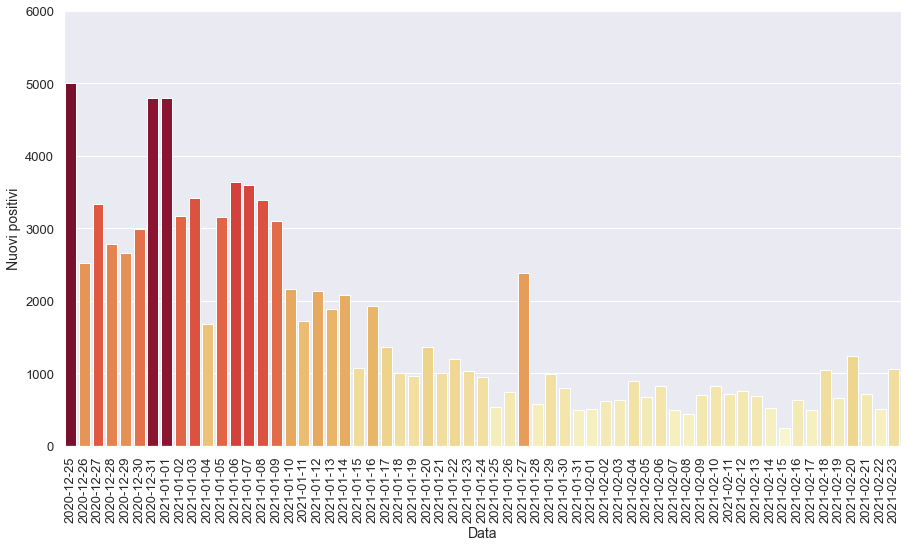

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

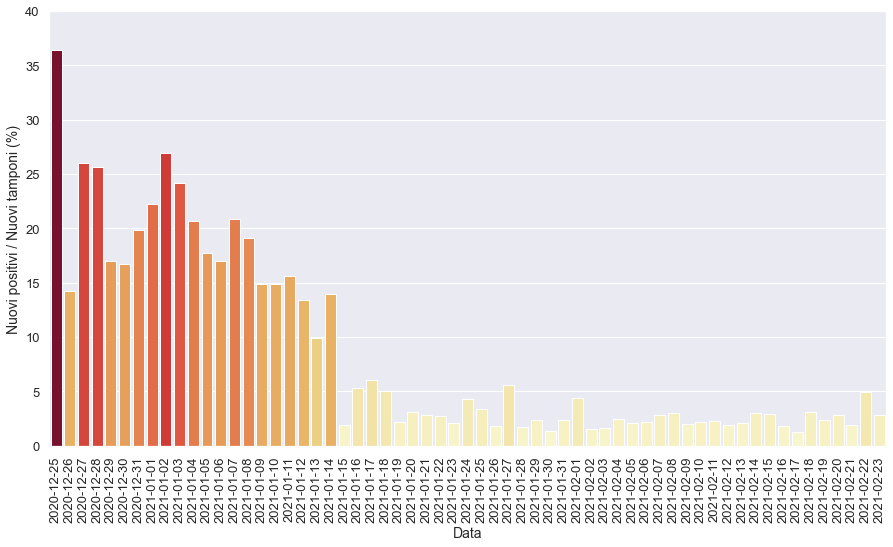

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

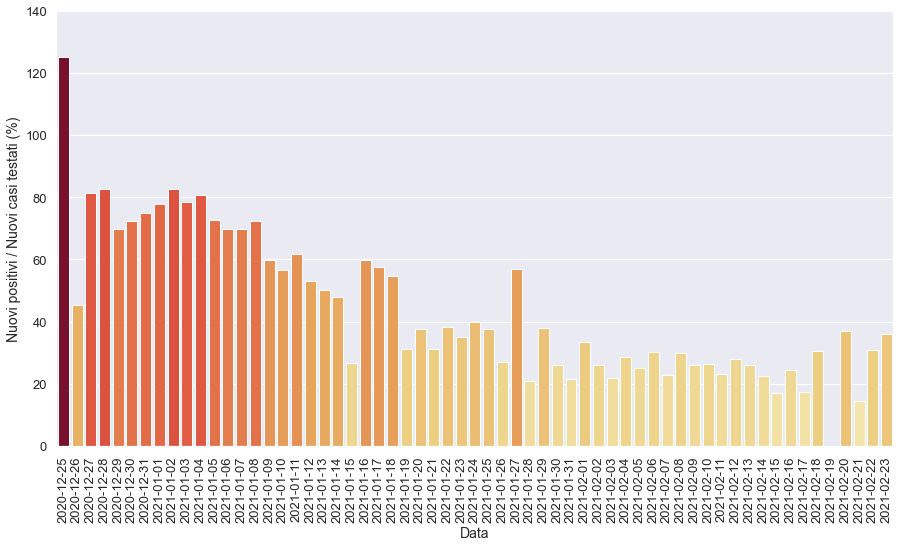

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

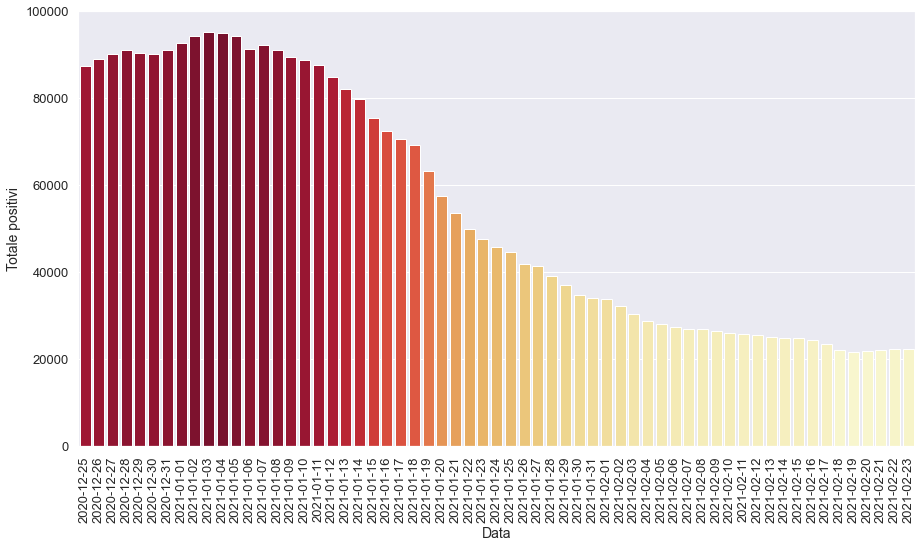

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

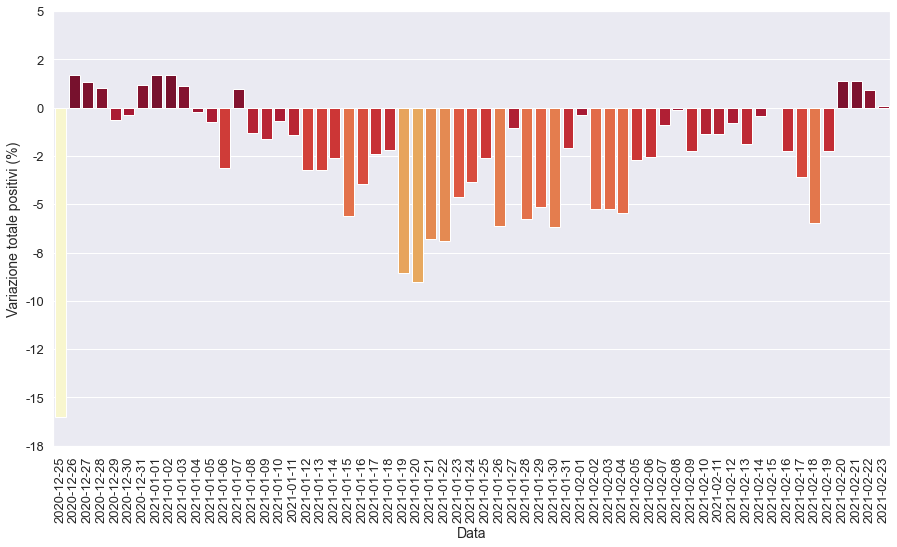

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

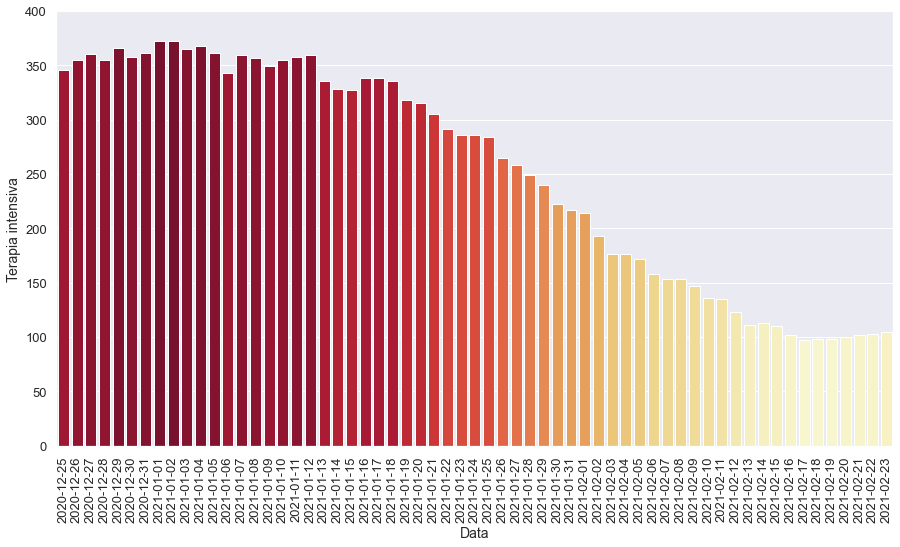

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

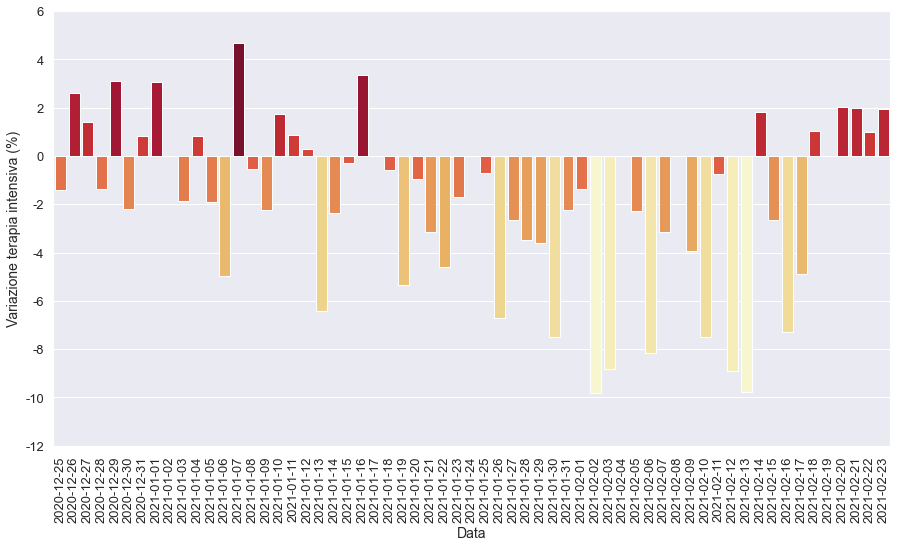

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

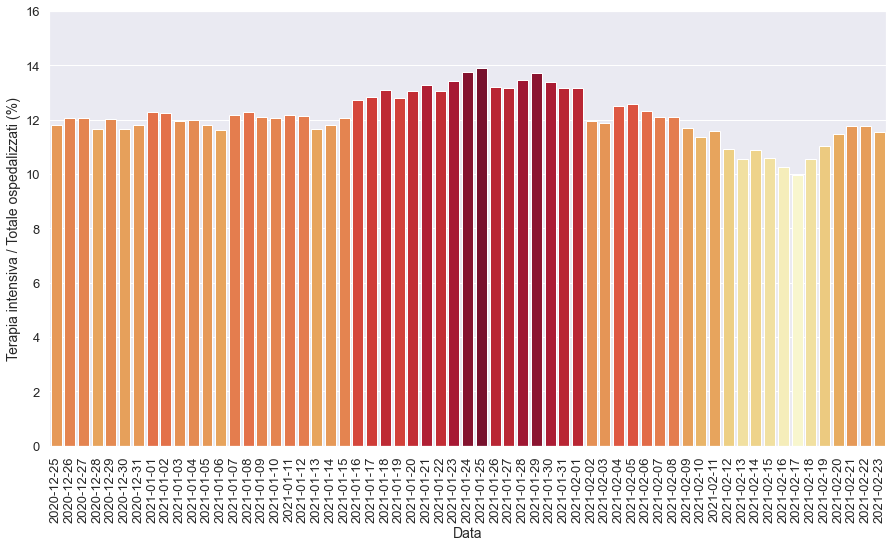

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

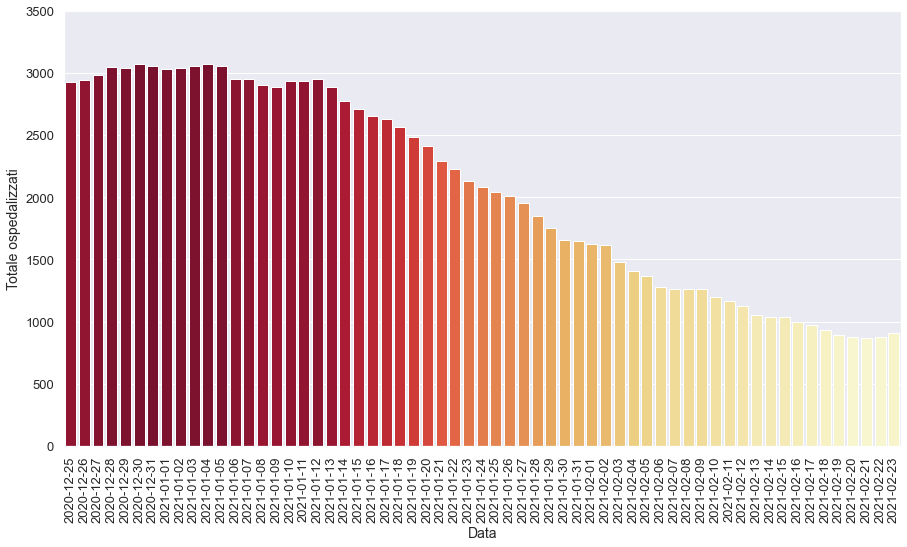

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

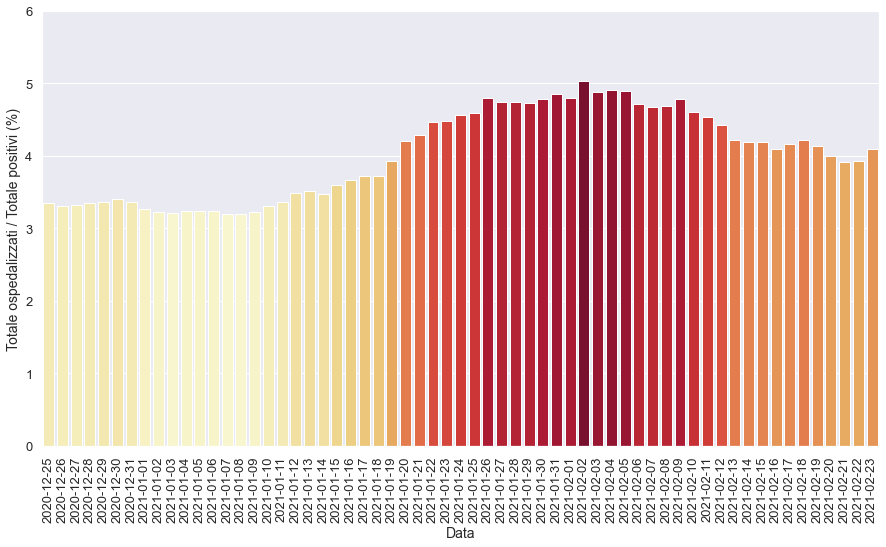

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

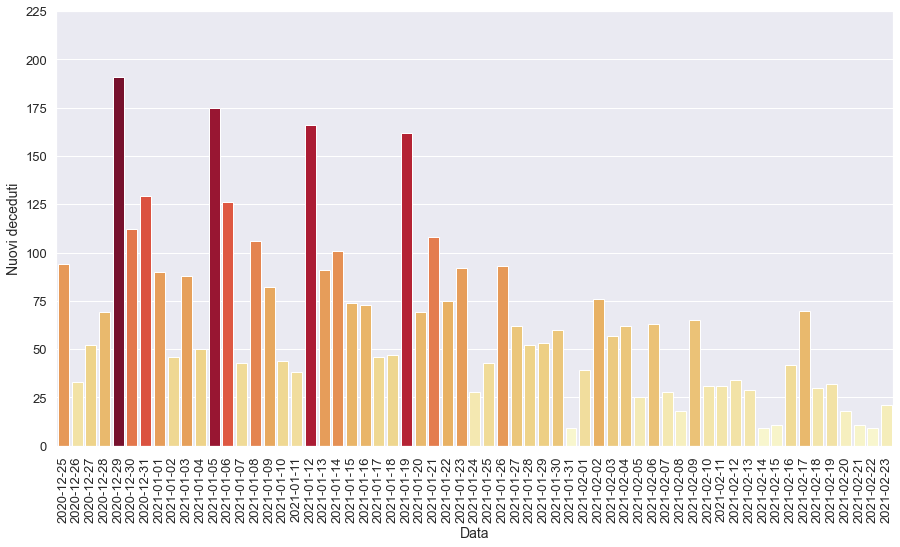

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

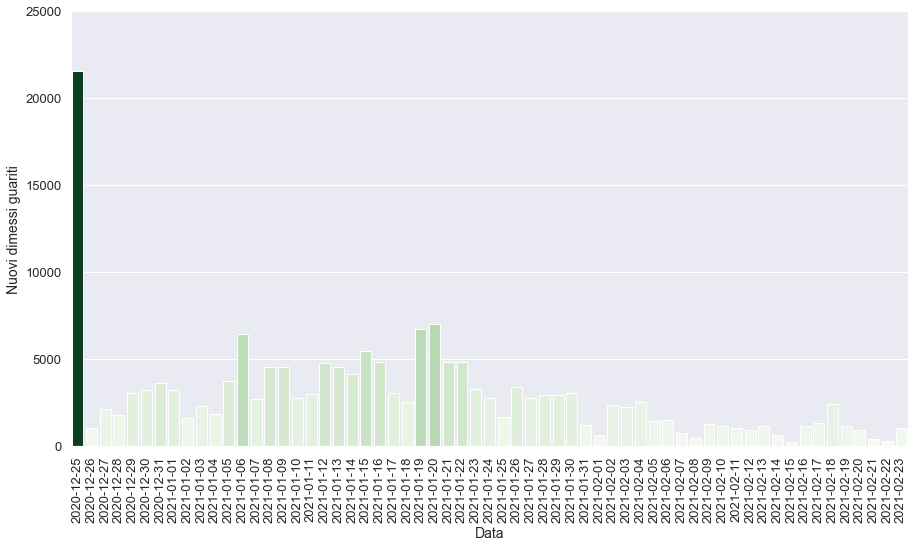

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,5,Veneto,1796,286,2082,43624,45706,-1835,956,...,28.0,22393.0,2396.0,-1788.0,13.74,4.56,4.27,39.90,0.00,-3.86
1,2021-01-25T17:00:00,5,Veneto,1761,284,2045,42474,44519,-1187,533,...,43.0,15554.0,1414.0,-1150.0,13.89,4.59,3.43,37.69,-0.70,-2.60
2,2021-01-26T17:00:00,5,Veneto,1742,265,2007,39780,41787,-2732,746,...,93.0,40857.0,2760.0,-2694.0,13.20,4.80,1.83,27.03,-6.69,-6.14
3,2021-01-27T17:00:00,5,Veneto,1700,258,1958,39387,41345,-442,2385,...,62.0,42855.0,4179.0,-393.0,13.18,4.74,5.57,57.07,-2.64,-1.06
4,2021-01-28T17:00:00,5,Veneto,1599,249,1848,37116,38964,-2381,572,...,52.0,32662.0,2745.0,-2271.0,13.47,4.74,1.75,20.84,-3.49,-5.76
5,2021-01-29T17:00:00,5,Veneto,1509,240,1749,35216,36965,-1999,985,...,53.0,40820.0,2604.0,-1900.0,13.72,4.73,2.41,37.83,-3.61,-5.13
6,2021-01-30T17:00:00,5,Veneto,1438,222,1660,33017,34677,-2288,792,...,60.0,57107.0,3053.0,-2199.0,13.37,4.79,1.39,25.94,-7.50,-6.19
7,2021-01-31T17:00:00,5,Veneto,1430,217,1647,32298,33945,-732,499,...,9.0,21044.0,2313.0,-719.0,13.18,4.85,2.37,21.57,-2.25,-2.11
8,2021-02-01T17:00:00,5,Veneto,1410,214,1624,32196,33820,-125,510,...,39.0,11562.0,1519.0,-102.0,13.18,4.80,4.41,33.57,-1.38,-0.37
9,2021-02-02T17:00:00,5,Veneto,1423,193,1616,30428,32044,-1776,621,...,76.0,39304.0,2374.0,-1768.0,11.94,5.04,1.58,26.16,-9.81,-5.25


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

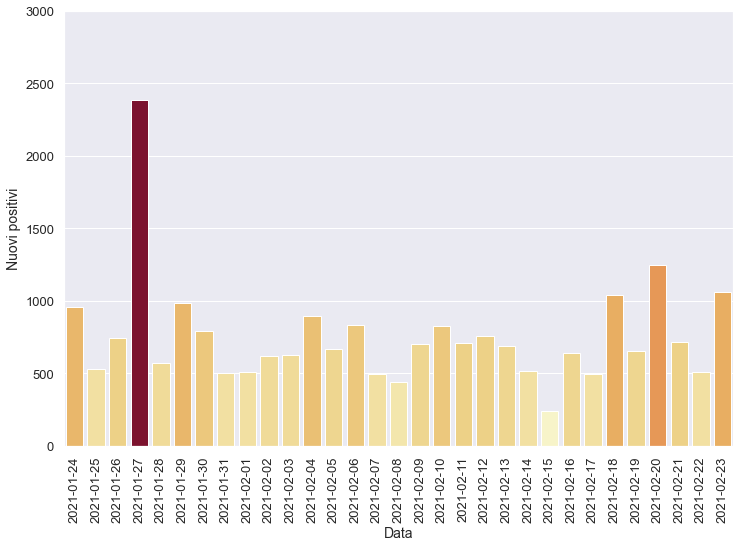

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

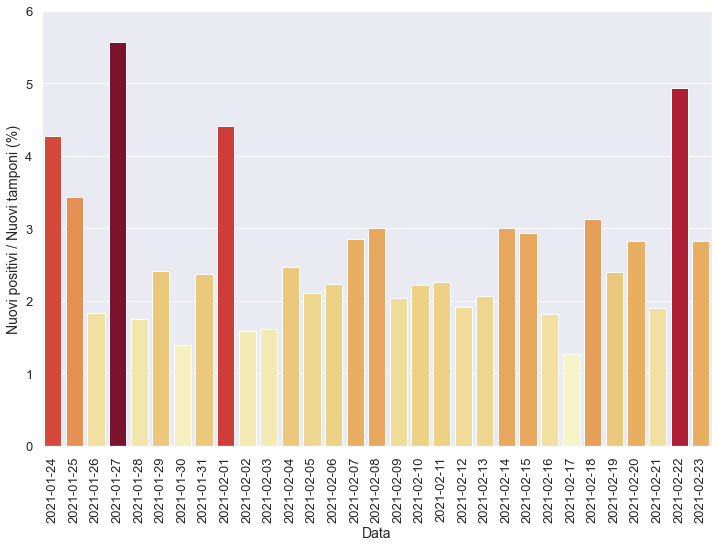

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

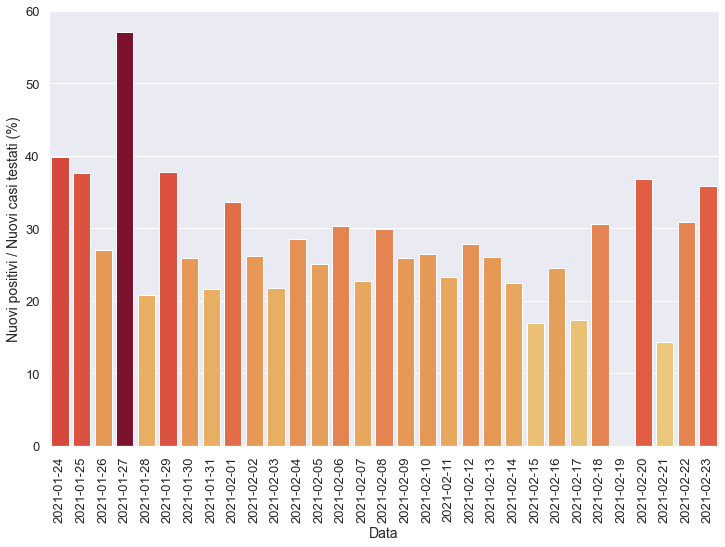

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

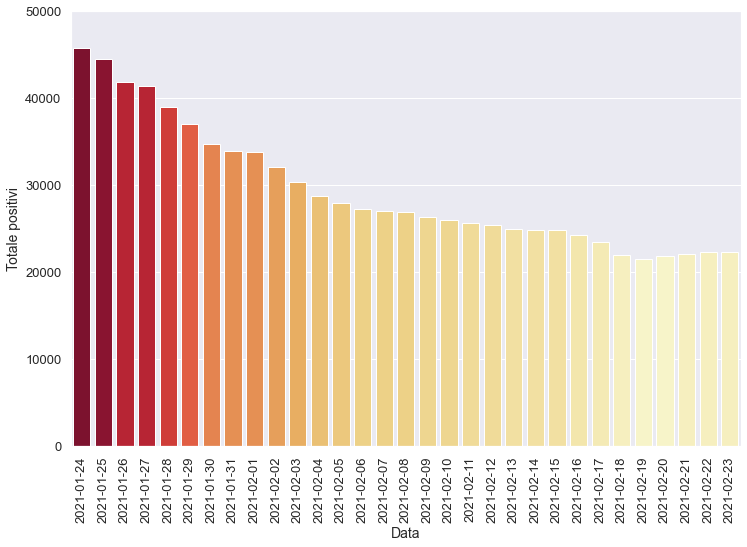

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

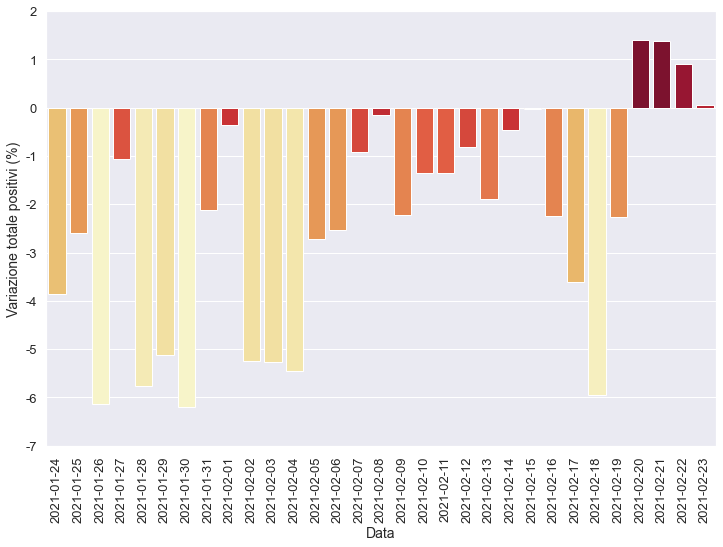

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

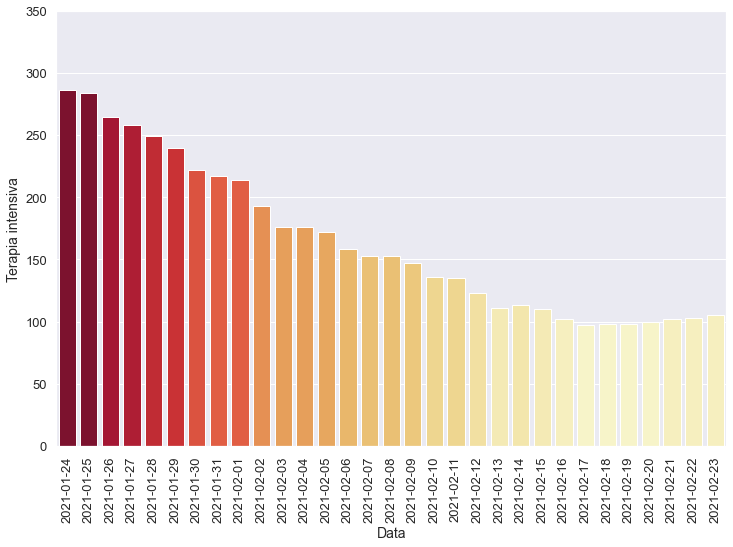

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

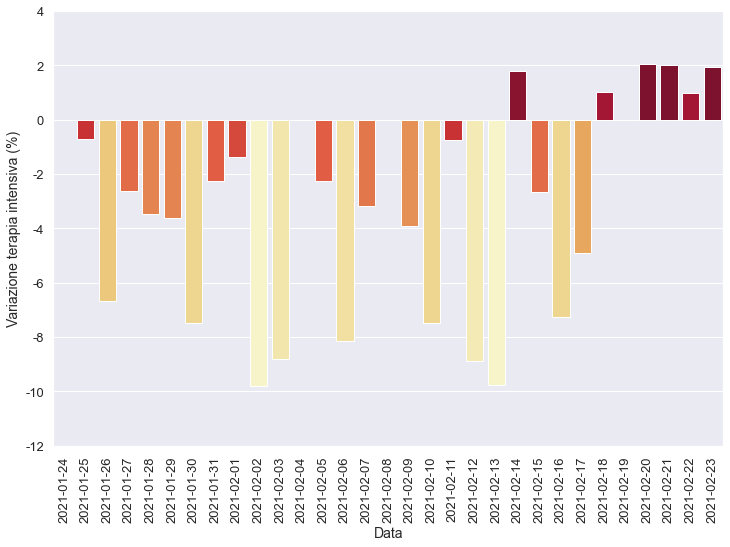

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

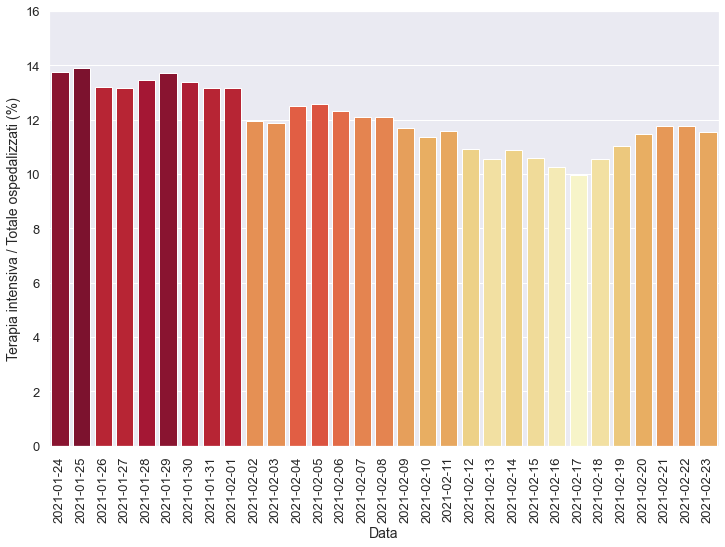

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

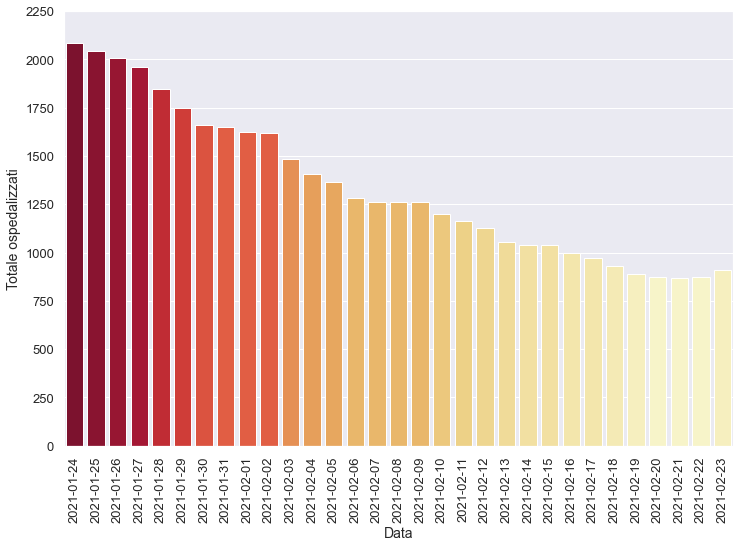

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

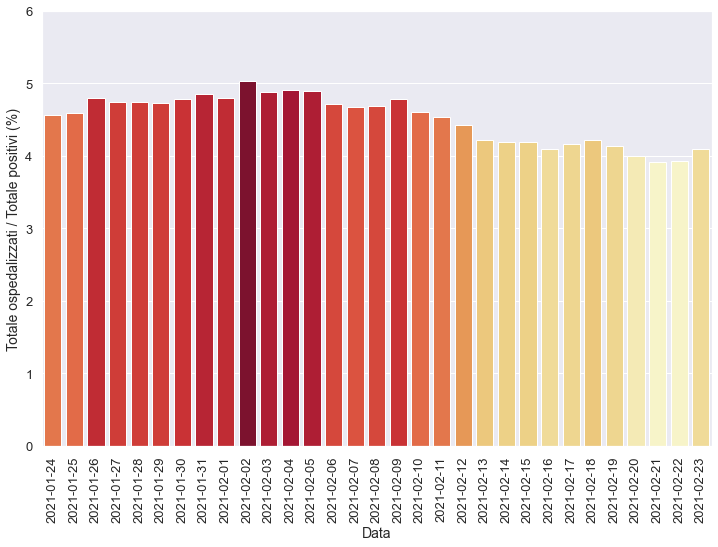

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

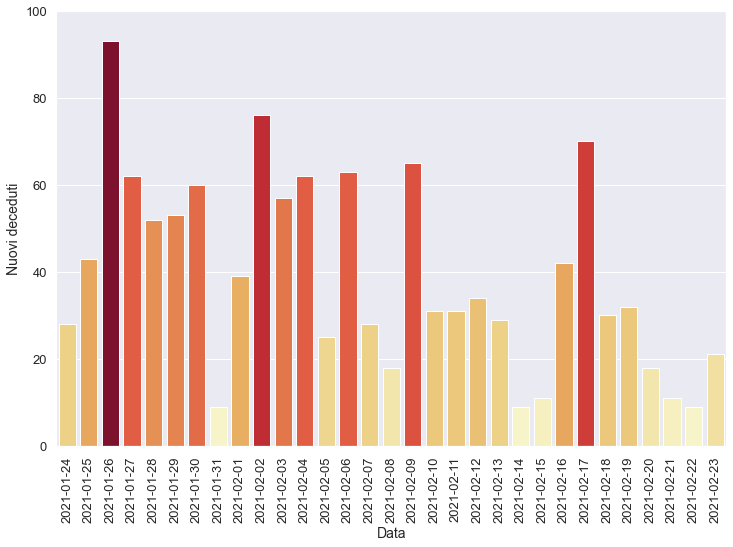

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

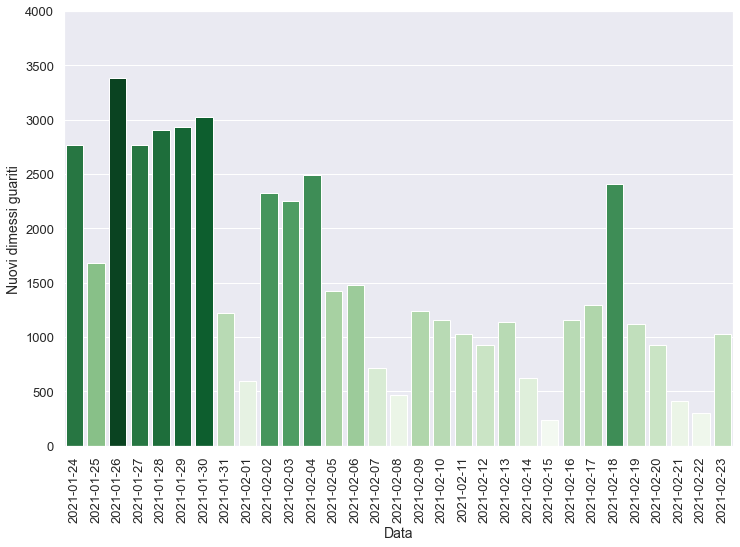

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-16T17:00:00,5,Veneto,893,102,995,23258,24253,-557,638,...,42.0,35030.0,2598.0,-513.0,10.25,4.10,1.82,24.56,-7.27,-2.25
1,2021-02-17T17:00:00,5,Veneto,875,97,972,22406,23378,-875,492,...,70.0,39030.0,2837.0,-852.0,9.98,4.16,1.26,17.34,-4.90,-3.61
2,2021-02-18T17:00:00,5,Veneto,830,98,928,21058,21986,-1392,1042,...,30.0,33254.0,3400.0,-1348.0,10.56,4.22,3.13,30.65,1.03,-5.95
3,2021-02-19T17:00:00,5,Veneto,790,98,888,20599,21487,-499,657,...,32.0,27341.0,0.0,-459.0,11.04,4.13,2.40,0.00,0.00,-2.27
4,2021-02-20T17:00:00,5,Veneto,772,100,872,20915,21787,300,1244,...,18.0,44145.0,3377.0,316.0,11.47,4.00,2.82,36.84,2.04,1.40
5,2021-02-21T17:00:00,5,Veneto,764,102,866,21219,22085,298,718,...,11.0,37790.0,5033.0,304.0,11.78,3.92,1.90,14.27,2.00,1.37
6,2021-02-22T17:00:00,5,Veneto,772,103,875,21409,22284,199,509,...,9.0,10314.0,1651.0,190.0,11.77,3.93,4.94,30.83,0.98,0.90
7,2021-02-23T17:00:00,5,Veneto,806,105,911,21386,22297,13,1062,...,21.0,37605.0,2960.0,-23.0,11.53,4.09,2.82,35.88,1.94,0.06


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

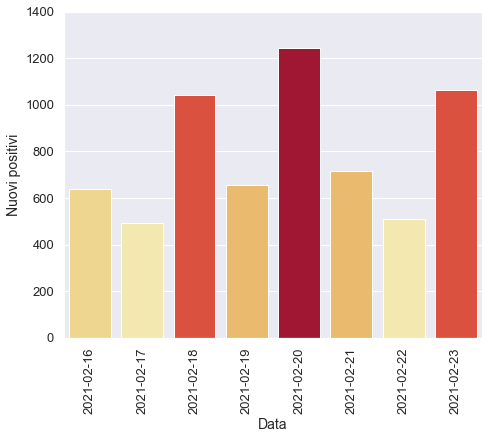

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

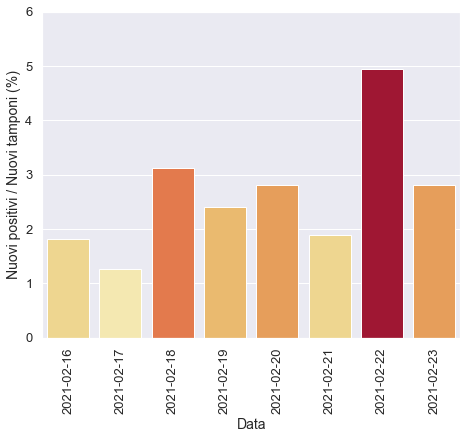

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

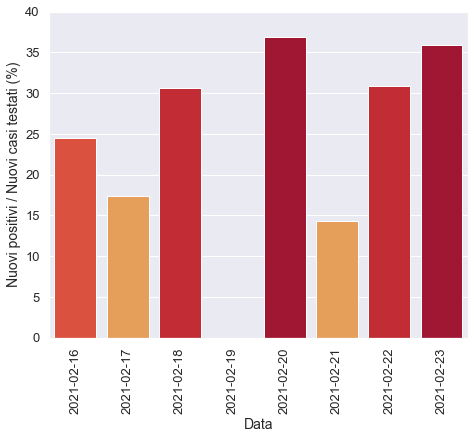

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

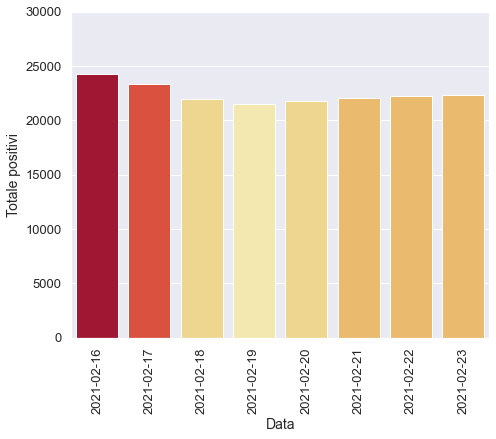

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

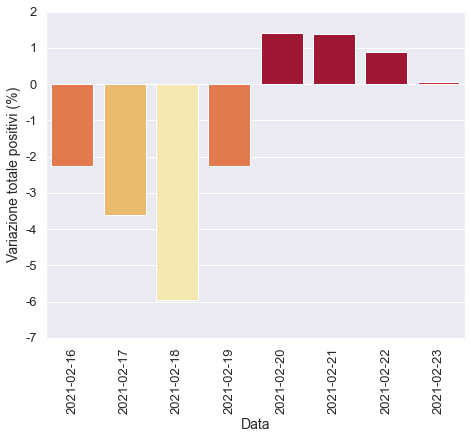

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

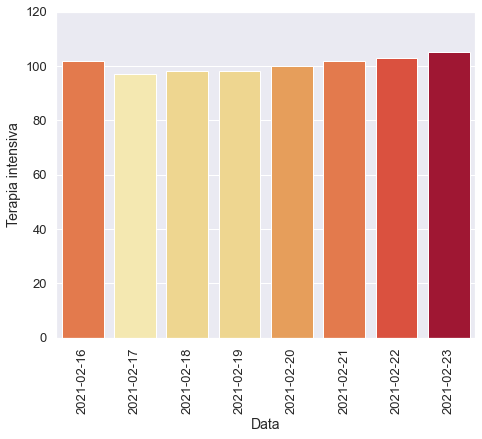

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

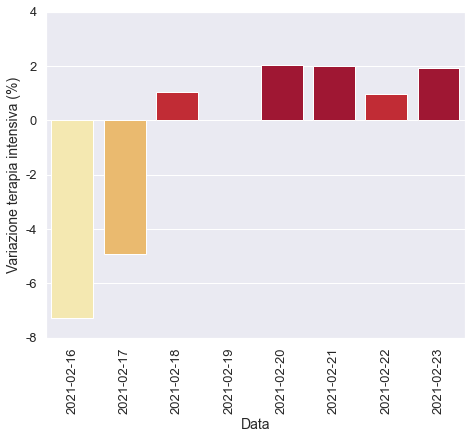

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

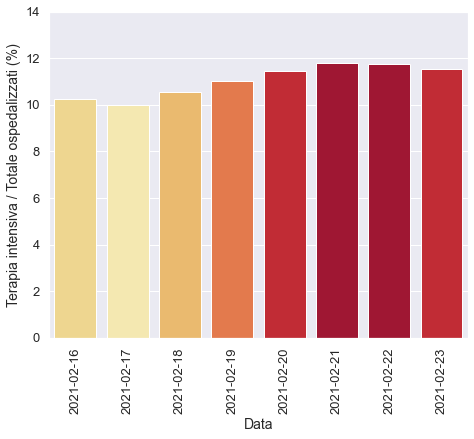

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

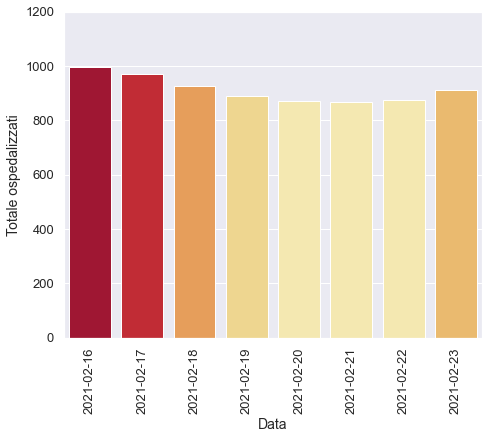

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

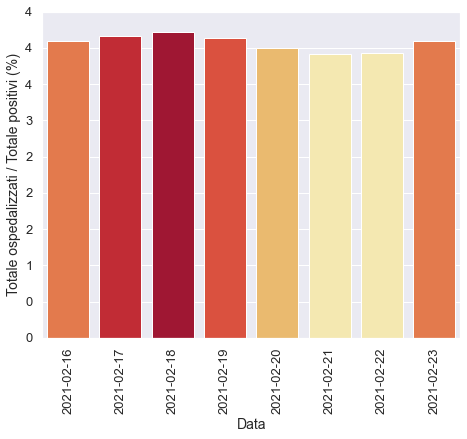

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

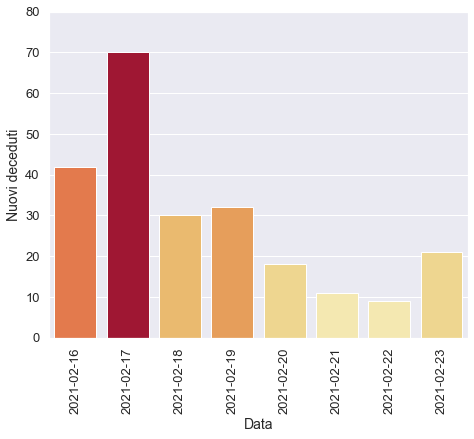

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

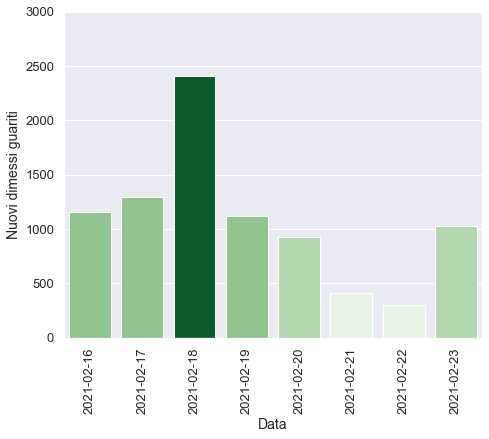

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)